### Import models and load data

In [50]:
import torch
torch.manual_seed(1234)

from importlib import reload
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import sys

mini_batch_size = 1000
nb_runs = 2

### 1channel2images

In [ ]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _1channel2images
reload(_1channel2images)
from _1channel2images import *
print("Working with 1channel2images framework, nb_classes = ", nb_classes)

In [ ]:
model1C_list = [BaseNet1C(), ConvNet1_1C()]
lr = 0.01
nb_epochs = 100 # way sufficient for this framework
for model_1C in model1C_list:
    test_results_1C = multiple_training_runs_1C(model_1C, nb_runs, lr, mini_batch_size, nb_epochs, verbose=True)
    write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)

In [ ]:
import pandas as pd
print(test_results_1C)
write_to_csv_1C('1channel2images.csv', model_1C, test_results_1C, lr, nb_epochs)
data = pd.read_csv('1channel2images.csv')
data.head()

### 2channels1image

In [70]:
sys.path.insert(0, "channelimagesModels")
import BaseNet
reload(BaseNet)
from BaseNet import *
import ConvNet1
reload(ConvNet1)
from ConvNet1 import *
import _2channels1image
reload(_2channels1image)
from _2channels1image import *
import test
reload(test)
from test import *
print("Working with 2channels1image framework, nb_classes = ", nb_classes)

Working with 2channels1image framework, nb_classes =  1


phase: train, epoch: 100, loss: 0.30287, acc: 0.8760
phase: val, epoch: 100, loss: 0.29904, acc: 0.8790
Training complete in 0 min 8 s
Best val acc: 0.8790
phase: train, epoch: 100, loss: 0.36141, acc: 0.8550
phase: val, epoch: 100, loss: 0.35842, acc: 0.8560
Training complete in 0 min 11 s
Best val acc: 0.8560
phase: train, epoch: 100, loss: 0.41627, acc: 0.8050
phase: val, epoch: 100, loss: 0.41181, acc: 0.8090
phase: train, epoch: 200, loss: 0.03904, acc: 1.0000
phase: val, epoch: 200, loss: 0.03777, acc: 1.0000
Training complete in 2 min 34 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.37475, acc: 0.8470
phase: val, epoch: 100, loss: 0.37043, acc: 0.8500
phase: train, epoch: 200, loss: 0.02872, acc: 1.0000
phase: val, epoch: 200, loss: 0.02786, acc: 1.0000
Training complete in 2 min 28 s
Best val acc: 1.0000
phase: train, epoch: 100, loss: 0.11948, acc: 0.9730
phase: val, epoch: 100, loss: 0.11402, acc: 0.9780
Training complete in 3 min 56 s
Best val acc: 1.0000
phase: t

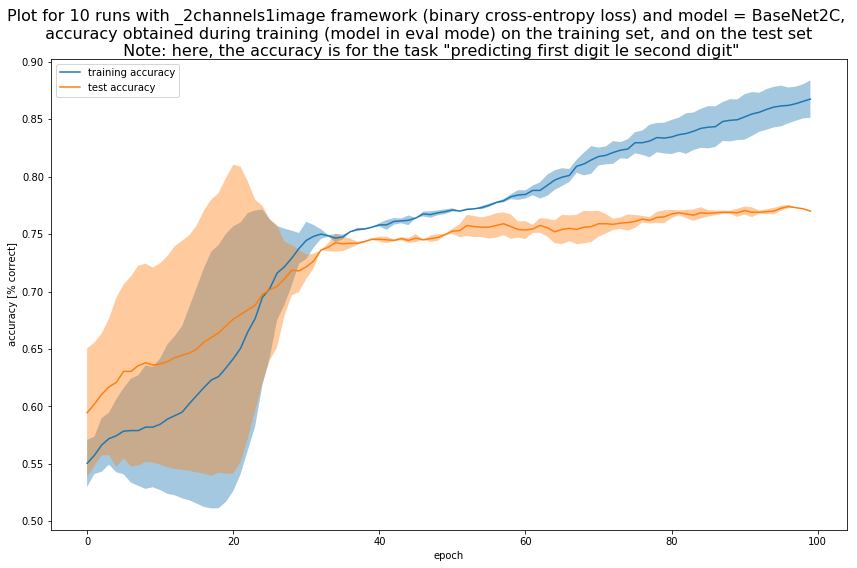

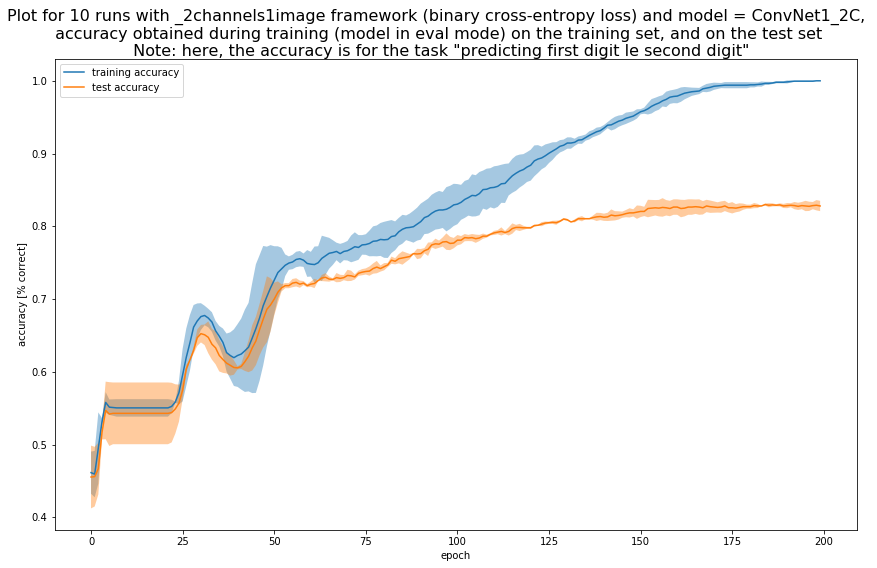

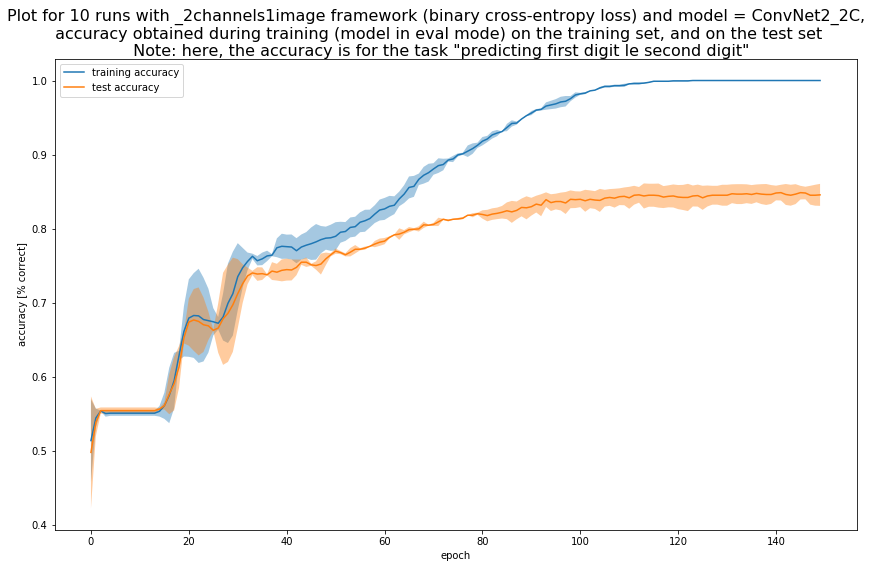

In [71]:
model2C_list = [BaseNet2C(), ConvNet1_2C(), ConvNet2_2C()]
nb_epochs_list = [100, 200, 150]
for (nb_epochs, model_2C) in zip(nb_epochs_list, model2C_list):
    test_results_2C = multiple_training_runs_fn(model_2C, train_model_2C, test_model_2C, title_2C, nb_runs, lr, 
                                                mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)

In [ ]:
print(test_results_2C)
write_to_csv('2channels1image.csv', model_2C, test_results_2C, lr, nb_epochs)
data = pd.read_csv('2channels1image.csv')
data.head()

### Weight Sharing

In [113]:
sys.path.insert(0, "weightssharingModels")
import NetSharing
reload(NetSharing)
from NetSharing import *
import weight_sharing
reload(weight_sharing)
from weight_sharing import *
print("Working with weight_sharing framework")

Working with weight_sharing framework


In [114]:
modelws_list = [NetSharing1(), NetSharing2(), NetSharing2b(), NetSharing3()] # Stronger reg on Net3
nb_epochs_list = [150, 150, 150, 200]
#modelws_list = [NetSharing2b()]
#nb_epochs_list = [150]
for (nb_epochs, model_ws) in zip(nb_epochs_list, modelws_list):
    test_results_ws = multiple_training_runs_fn(model_ws, train_model_ws, test_model_ws, title_ws, nb_runs, lr, 
                                                 mini_batch_size, nb_epochs, verbose=True)
    write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)

KeyboardInterrupt: 

In [107]:
import pandas as pd
print(test_results_ws)
write_to_csv('weightsharing.csv', model_ws, test_results_ws, lr, nb_epochs)
data = pd.read_csv('weightsharing.csv')
data.head()

(244.0330090522766, 2.0037434488561954, 0.831, 0.029698484809834943, 0.55, 0.005656854249492385)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,NetSharing1,44517,0.01,150,94.51,0.9245,0.0134,0.8370,0.0071
1,NetSharing2,125897,0.01,150,244.03,0.8310,0.0297,0.5500,0.0057
2,NetSharing3,177097,0.01,100,136.44,0.9026,0.0135,0.8368,0.0090


### Auxiliary Losses

In [95]:
sys.path.insert(0, "auxiliarylossesModels")
import Incept
reload(Incept)
from Incept import *
#import auxiliary_losses
#reload(auxiliary_losses)
#from auxiliary_losses import *
import auxiliary_losses_NEW
reload(auxiliary_losses_NEW)
from auxiliary_losses_NEW import *
import generic_helpers
reload(generic_helpers)
from generic_helpers import *
import test
reload(test)
from test import *
print("Working with auxiliary losses framework")

Working with auxiliary losses framework


mean and std train = -2.2374366892563557e-07, 1.0 and mean and std test = 0.000691172550432384, 1.0043054819107056
e = 0, nb_correct_digits = 216, nb_correct_pairs = 484
phase: train, epoch: 10, loss: 1.15222, acc: 0.5260, acc_digits: 0.1020
phase: val, epoch: 10, loss: 1.15096, acc: 0.5260, acc_digits: 0.0975
e = 10, nb_correct_digits = 233, nb_correct_pairs = 514
phase: train, epoch: 20, loss: 1.14806, acc: 0.5420, acc_digits: 0.1110
phase: val, epoch: 20, loss: 1.14588, acc: 0.5420, acc_digits: 0.1155
e = 20, nb_correct_digits = 214, nb_correct_pairs = 519
phase: train, epoch: 30, loss: 1.14549, acc: 0.5420, acc_digits: 0.1235
phase: val, epoch: 30, loss: 1.14050, acc: 0.5420, acc_digits: 0.1655
e = 30, nb_correct_digits = 314, nb_correct_pairs = 519
phase: train, epoch: 40, loss: 1.13630, acc: 0.5520, acc_digits: 0.1510
phase: val, epoch: 40, loss: 1.13526, acc: 0.5420, acc_digits: 0.1995
e = 40, nb_correct_digits = 414, nb_correct_pairs = 519
phase: train, epoch: 50, loss: 1.13381

e = 100, nb_correct_digits = 735, nb_correct_pairs = 684
phase: train, epoch: 110, loss: 1.04775, acc: 0.6710, acc_digits: 0.2705
phase: val, epoch: 110, loss: 1.01651, acc: 0.7120, acc_digits: 0.3740
e = 110, nb_correct_digits = 751, nb_correct_pairs = 701
phase: train, epoch: 120, loss: 1.02040, acc: 0.6940, acc_digits: 0.2920
phase: val, epoch: 120, loss: 1.00239, acc: 0.7140, acc_digits: 0.3860
e = 120, nb_correct_digits = 770, nb_correct_pairs = 698
phase: train, epoch: 130, loss: 1.00295, acc: 0.7080, acc_digits: 0.3065
phase: val, epoch: 130, loss: 0.98238, acc: 0.7220, acc_digits: 0.3945
e = 130, nb_correct_digits = 800, nb_correct_pairs = 704
phase: train, epoch: 140, loss: 0.98520, acc: 0.7300, acc_digits: 0.3210
phase: val, epoch: 140, loss: 0.96719, acc: 0.7280, acc_digits: 0.4075
e = 140, nb_correct_digits = 818, nb_correct_pairs = 705
phase: train, epoch: 150, loss: 0.97855, acc: 0.7180, acc_digits: 0.3260
phase: val, epoch: 150, loss: 0.94868, acc: 0.7330, acc_digits: 0.

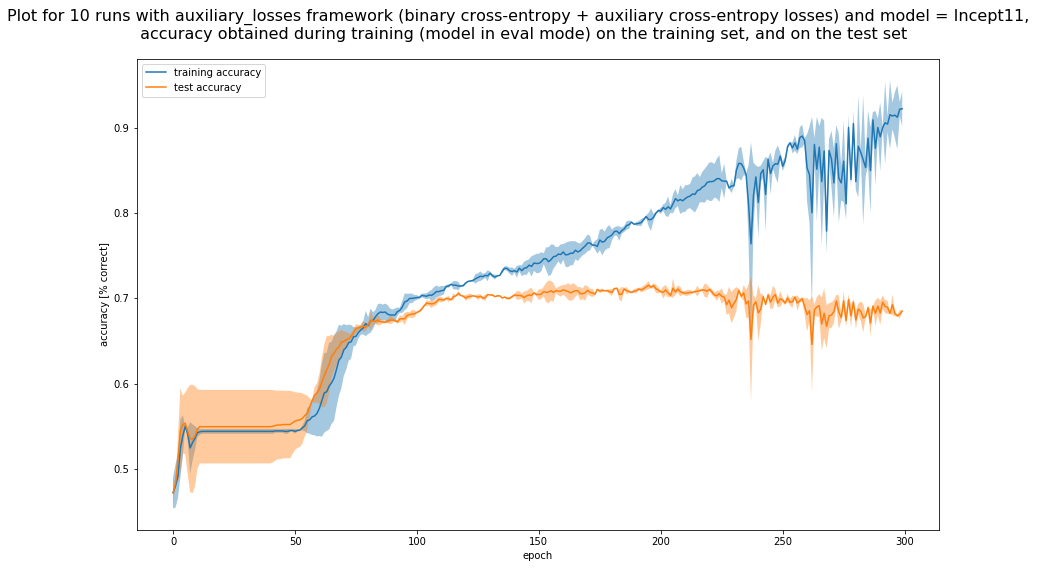

In [100]:
#modelaux_list = [Incept1(), Incept2(), Incept21(), Incept22(), Incept3(), Incept4()] # Stronger reg and longer training on Incept3
#nb_epochs_list = [100, 100, 300, 100]
modelaux_list = [Incept11()]
lr = 0.01
alpha_list = [0.1]
nb_epochs = 300
for model_aux in modelaux_list:
    for alpha in alpha_list:
#for nb_epochs, model_aux in zip(nb_epochs_list, modelaux_list):
        #test_results_aux = multiple_training_runs_fn(model_aux, train_model_aux, test_model_aux, title_aux, nb_runs, lr,
        #                                             mini_batch_size, nb_epochs, verbose=True)
        test_results_aux = multiple_training_runs_aux(model_aux, title_aux, nb_runs, lr, alpha,
                                                     mini_batch_size, nb_epochs, verbose=True)
        write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
        print("For alpha = {} and model {}, test_acc = {}".format(alpha, model_aux.name, test_results_aux[4]))
        
        train_input, train_target, train_classes, test_input, test_target, test_classes = load_random_datasets()
        _, _, test_output = model_aux(test_input)
        output_to_prediction = torch.ge(torch.sigmoid(test_output), 0.5).flatten()
        print("output_to_pred = ", output_to_prediction[:50])
        print("test_target = ", test_target[:20])
        


In [101]:
import pandas as pd
print(test_results_aux)
write_to_csv('auxiliary_losses.csv', model_aux, test_results_aux, lr, nb_epochs)
data = pd.read_csv('auxiliary_losses.csv')
data.head()

(293.2542048692703, 27.929850811901062, 0.9299999999999999, 0.01979898987322327, 0.684, 0.0014142135623730963)


,Model,Number of parameters,Learning rate,Number of epochs,Training time,Mean best training accuracy,Std best training accuracy,Mean test accuracy,Std test accuracy
0,Incept1,409327,0.01,100,121.26,1.0000,0.0000,0.6950,0.0028
1,Incept2,396031,0.01,100,219.24,0.5540,0.0057,0.5535,0.0064
2,Incept3,219203,0.01,300,599.99,0.5705,0.0078,0.5490,0.0184
3,Incept4,247253,0.01,100,72.96,0.7655,0.0148,0.6990,0.0255
4,InceptCheat,130855,0.01,100,199.52,0.6965,0.0516,0.6930,0.0792
